# The goald here will be to create different samples of images according to the taret variable in order to have, for each choosen target a well equilibrated dataset

In [0]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive',force_remount=True)
%matplotlib inline

Mounted at /content/gdrive


In [0]:
desc = pd.read_csv('/content/gdrive/My Drive/Big Data/Projet/list_attr_celeba.csv')

In [0]:
desc2 = desc[['image_id', 'Attractive','Bald','Black_Hair', 'Blond_Hair', 
              'Blurry', 'Brown_Hair', 'Eyeglasses','Gray_Hair','Male', 
              'Mustache', 'No_Beard', 'Pale_Skin', 'Smiling', 'Straight_Hair', 
              'Wavy_Hair', 'Young']]

In [0]:
for i in desc2.columns :
    desc2[i] = desc2[i].apply(lambda x : 0 if x == -1 else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
desc2 = desc2.set_index('image_id')

In [0]:
desc3 = desc2.T

In [0]:
desc3.head()

image_id,000001.jpg,000002.jpg,000003.jpg,000004.jpg,000005.jpg,000006.jpg,000007.jpg,000008.jpg,000009.jpg,000010.jpg,000011.jpg,000012.jpg,000013.jpg,000014.jpg,000015.jpg,000016.jpg,000017.jpg,000018.jpg,000019.jpg,000020.jpg,000021.jpg,000022.jpg,000023.jpg,000024.jpg,000025.jpg,000026.jpg,000027.jpg,000028.jpg,000029.jpg,000030.jpg,000031.jpg,000032.jpg,000033.jpg,000034.jpg,000035.jpg,000036.jpg,000037.jpg,000038.jpg,000039.jpg,000040.jpg,...,202560.jpg,202561.jpg,202562.jpg,202563.jpg,202564.jpg,202565.jpg,202566.jpg,202567.jpg,202568.jpg,202569.jpg,202570.jpg,202571.jpg,202572.jpg,202573.jpg,202574.jpg,202575.jpg,202576.jpg,202577.jpg,202578.jpg,202579.jpg,202580.jpg,202581.jpg,202582.jpg,202583.jpg,202584.jpg,202585.jpg,202586.jpg,202587.jpg,202588.jpg,202589.jpg,202590.jpg,202591.jpg,202592.jpg,202593.jpg,202594.jpg,202595.jpg,202596.jpg,202597.jpg,202598.jpg,202599.jpg
Attractive,1,0,0,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1,1,0,0,0,1,1,1,0,0,1,1,1,...,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1
Bald,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Black_Hair,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
Blond_Hair,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
Blurry,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


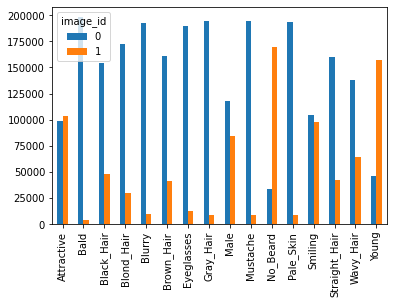

In [0]:
desc3['1'] = desc3.sum(axis = 1)
desc3['0'] = desc3['1'].apply(lambda x : len(desc2) - x)
desc3 = desc3[['0','1']]
desc3.plot(kind = 'bar')

# Attractive

In [0]:
samp = np.random.choice(len(desc2),size = 20000, replace = False)

In [0]:
desc_attrac = desc.iloc[samp]

In [0]:
desc_attrac = desc_attrac[['image_id', 'Attractive']]

In [0]:
desc_attrac['Attractive'] = desc_attrac['Attractive'].apply(lambda x : 0 if x == -1 else x)
sum(desc_attrac['Attractive'])/20000

0.5099

In [0]:
ids = list(desc_attrac['image_id'])
with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/Attractive.pkl', 'wb') as f:
    pickle.dump(ids, f)

# Bald

In [0]:
desc_bald = desc[['image_id','Bald','Male']]

In [0]:
desc_bald['Bald'] = desc_bald['Bald'].apply(lambda x : 0 if x == -1 else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
desc_bald = desc_bald[desc_bald.Male == 1]

In [0]:
desc_bald_1 = desc_bald[desc_bald.Bald == 1]
desc_bald_0 = desc_bald[desc_bald.Bald == 0]

In [0]:
desc_bald_1

,image_id,Bald,Male
50,000051.jpg,1,1
78,000079.jpg,1,1
114,000115.jpg,1,1
124,000125.jpg,1,1
133,000134.jpg,1,1
...,...,...,...
202458,202459.jpg,1,1
202489,202490.jpg,1,1
202503,202504.jpg,1,1
202524,202525.jpg,1,1


In [0]:
samp = np.random.choice(len(desc_bald_0),size = 7000, replace = False)

In [0]:
desc_bald_0 = desc_bald_0.iloc[samp]

In [0]:
liste_0 = list(desc_bald_0.image_id)
liste_1 = list(desc_bald_1.image_id)
liste_bald = liste_0+liste_1
with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/Bald.pkl', 'wb') as f:
    pickle.dump(liste_bald, f)

In [0]:
len(liste_bald)

11530

# Black hair + blond hair + brown hair + straight hair + wavy hair

In [0]:
Black_Hair     = desc[['image_id','Black_Hair']]
Blond_Hair     = desc[['image_id','Blond_Hair']]
Brown_Hair     = desc[['image_id','Brown_Hair']] 
Straight_Hair  = desc[['image_id','Straight_Hair']]
Wavy_Hair     = desc[['image_id','Wavy_Hair']]

In [0]:
Black_Hair['Black_Hair']       = Black_Hair['Black_Hair'].apply(lambda x : 0 if x == -1 else x)   
Blond_Hair['Blond_Hair']       = Blond_Hair['Blond_Hair'].apply(lambda x : 0 if x == -1 else x)   
Brown_Hair['Brown_Hair']       = Brown_Hair['Brown_Hair'].apply(lambda x : 0 if x == -1 else x)   
Wavy_Hair['Wavy_Hair']         =  Wavy_Hair['Wavy_Hair'].apply(lambda x : 0 if x == -1 else x)  
Straight_Hair['Straight_Hair'] = Straight_Hair['Straight_Hair'].apply(lambda x : 0 if x == -1 else x)  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [0]:
Black_Hair1    = Black_Hair[Black_Hair['Black_Hair'] == 1]      
Blond_Hair1    = Blond_Hair[Blond_Hair['Blond_Hair'] == 1]      
Brown_Hair1    = Brown_Hair[Brown_Hair['Brown_Hair'] == 1]      
Wavy_Hair1     = Wavy_Hair[Wavy_Hair['Wavy_Hair'] == 1]        
Straight_Hair1 = Straight_Hair[Straight_Hair['Straight_Hair'] == 1]

In [0]:
Black_Hair0 = Black_Hair[Black_Hair['Black_Hair'] == 0]      
Blond_Hair0 = Blond_Hair[Blond_Hair['Blond_Hair'] == 0]      
Brown_Hair0 = Brown_Hair[Brown_Hair['Brown_Hair'] == 0]      
Wavy_Hair0  = Wavy_Hair[Wavy_Hair['Wavy_Hair'] == 0]        
Straight_Hair0 = Straight_Hair[Straight_Hair['Straight_Hair'] == 0]

In [0]:
sample_bla_0 = np.random.choice(len(Black_Hair0),size = 10000, replace = False)
sample_blo_0 = np.random.choice(len(Blond_Hair0),size = 10000, replace = False)
sample_bro_0 = np.random.choice(len(Brown_Hair0),size = 10000, replace = False)
sample_wav_0 = np.random.choice(len(Wavy_Hair0 ),size = 10000, replace = False)
sample_str_0 = np.random.choice(len(Straight_Hair0),size = 10000, replace = False)
sample_bla_1 = np.random.choice(len(Black_Hair1),size = 10000, replace = False)
sample_blo_1 = np.random.choice(len(Blond_Hair1),size = 10000, replace = False)
sample_bro_1 = np.random.choice(len(Brown_Hair1),size = 10000, replace = False)
sample_wav_1 = np.random.choice(len(Wavy_Hair1),size = 10000, replace = False)
sample_str_1 = np.random.choice(len(Straight_Hair1),size = 10000, replace = False)

In [0]:
Black_Hair1    = Black_Hair1.iloc[sample_bla_1]
Blond_Hair1    = Blond_Hair1.iloc[sample_blo_1]    
Brown_Hair1    = Brown_Hair1.iloc[sample_bro_1]    
Wavy_Hair1     = Wavy_Hair1.iloc[sample_wav_1]     
Straight_Hair1 = Straight_Hair1.iloc[sample_str_1]

In [0]:
Black_Hair0    = Black_Hair0.iloc[sample_bla_0]
Blond_Hair0    = Blond_Hair0.iloc[sample_blo_0]    
Brown_Hair0    = Brown_Hair0.iloc[sample_bro_0]    
Wavy_Hair0     = Wavy_Hair0.iloc[sample_wav_0]     
Straight_Hair0 = Straight_Hair0.iloc[sample_str_0]

In [0]:
liste_0 = list(Black_Hair0.image_id)
liste_1 = list(Black_Hair1.image_id)
liste_bla = liste_0+liste_1
with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/Black_Hair.pkl', 'wb') as f:
    pickle.dump(liste_bla, f)

liste_0 = list(Blond_Hair0.image_id)
liste_1 = list(Blond_Hair1.image_id)
liste_blo = liste_0+liste_1
with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/Blond_Hair.pkl', 'wb') as f:
    pickle.dump(liste_blo, f)

liste_0 = list(Brown_Hair0.image_id)
liste_1 = list(Brown_Hair1.image_id)
liste_bro = liste_0+liste_1
with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/Brown_Hair.pkl', 'wb') as f:
    pickle.dump(liste_bro, f)

liste_0 = list(Wavy_Hair0.image_id)
liste_1 = list(Wavy_Hair1.image_id)
liste_wav = liste_0+liste_1
with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/Wavy_Hair.pkl', 'wb') as f:
    pickle.dump(liste_wav, f)

liste_0 = list(Straight_Hair0.image_id)
liste_1 = list(Straight_Hair1.image_id)
liste_str = liste_0+liste_1
with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/Straight_Hair.pkl', 'wb') as f:
    pickle.dump(liste_str, f)


In [0]:
len(liste_str)

20000

# Eyeglass

In [0]:
eyeglass = desc[['image_id','Eyeglasses']]

In [0]:
eyeglass_0 = eyeglass[eyeglass['Eyeglasses'] == -1]
eyeglass_1 = eyeglass[eyeglass['Eyeglasses'] == 1]

In [0]:
liste_eyeglass_0 = np.random.choice(len(eyeglass_0),size = 10000, replace = False)
liste_eyeglass_1 = np.random.choice(len(eyeglass_1),size = 10000, replace = False)


In [0]:
eyeglass_0 = eyeglass_0.iloc[liste_eyeglass_0]
eyeglass_1 = eyeglass_1.iloc[liste_eyeglass_1]

In [0]:
liste_0 = list(eyeglass_0['image_id'])
liste_1 = list(eyeglass_1['image_id']) 
liste_eye = liste_0+liste_1

In [0]:
with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/Eyeglasses.pkl', 'wb') as f:
    pickle.dump(liste_eye, f)

# Gray hair

In [0]:
liste_gray_1 = list(desc['image_id'][desc['Gray_Hair']==1 ])

In [0]:
gray_0 = desc[desc.Gray_Hair == -1]
sample_gray = np.random.choice(len(gray_0), size = 10000, replace = False)
gray_0 = gray_0.iloc[sample_gray]
liste_gray_0 = list(gray_0['image_id'])
liste_gray = liste_gray_0+liste_gray_1

In [0]:
with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/Gray_Hair.pkl', 'wb') as f:
    pickle.dump(liste_gray, f)

# Male

In [0]:
male = desc[desc.Male == 1]
female = desc[desc.Male == -1]

In [0]:
samp_m = np.random.choice(len(male), size = 10000, replace = False)
samp_f = np.random.choice(len(female), size = 10000, replace = False)

In [0]:
male = male.iloc[samp_m]
female = female.iloc[samp_f]

In [0]:
liste_m = list(male.image_id)
liste_f = list(female.image_id)
liste_sex = liste_m + liste_f

with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/Male.pkl', 'wb') as f:
    pickle.dump(liste_sex, f)

# Mustache

In [0]:
mustach = list(desc['image_id'][desc.Mustache==1])

In [0]:
len(mustach)

8417

In [0]:
no_must = desc[desc.Mustache == -1]

In [0]:
samp_must = np.random.choice(len(no_must), size = 10000, replace = False)
no_must = no_must.iloc[samp_must]
liste_no_must = list(no_must['image_id'])

In [0]:
liste_must = mustach + liste_no_must

with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/Mustache.pkl', 'wb') as f:
    pickle.dump(liste_must, f)

# No Beard

In [0]:
no_beards = desc[desc.Male == 1]
no_beards = no_beards[['image_id','No_Beard']]

In [0]:
no_beard = no_beards[no_beards.No_Beard == 1]
beard = no_beards[no_beards.No_Beard == -1]

In [0]:
samp_no = np.random.choice(len(no_beard), size = 10000, replace = False)
samp_be = np.random.choice(len(beard), size = 10000, replace = False)

In [0]:
beard = beard.iloc[samp_be]
no_beard = no_beard.iloc[samp_no]

In [0]:
liste_be = list(beard.image_id)
liste_no = list(no_beard.image_id)
liste_be_tot = liste_be + liste_no

with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/No_Beard.pkl', 'wb') as f:
    pickle.dump(liste_be_tot, f)

# Pale skin

In [0]:
liste_pale = list(desc['image_id'][desc['Pale_Skin'] == 1])

In [0]:
len(liste_pale)

8701

In [0]:
no_pale = desc[desc['Pale_Skin'] == -1]
samp_no_pale = np.random.choice(len(no_pale),size = 10000, replace = False)
no_pale = no_pale.iloc[samp_no_pale]
liste_no_pale = list(no_pale.image_id)
liste_fin = liste_no_pale+liste_pale

with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/Pale_Skin.pkl', 'wb') as f:
    pickle.dump(liste_fin, f)

# Smilling

In [0]:
samp_smile = np.random.choice(len(desc),size = 20000, replace = False)
smile = desc[['image_id','Smiling']]
smile = smile.iloc[samp_smile]

In [0]:
sum(smile['Smiling'][smile.Smiling == 1])

9634

In [0]:
liste_smile = list(smile.image_id)
with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/Smiling.pkl', 'wb') as f:
    pickle.dump(liste_smile, f)

# Young

In [0]:
young = desc[desc.Young == 1]
old = desc[desc.Young == -1]

samp_youg = np.random.choice(len(young), size = 10000, replace = False)
samp_old = np.random.choice(len(old), size = 10000, replace = False)

young = young.iloc[samp_youg]
old = old.iloc[samp_old]

list_young = list(young.image_id)
list_old = list(old.image_id)
list_fin = list_young + list_old

with open('/content/gdrive/My Drive/Big Data/Projet/Listes sample/Young.pkl', 'wb') as f:
    pickle.dump(list_fin, f)


# Vérification des samples

Attractive.pkl
Bald.pkl
Gray_Hair.pkl
No_Beard.pkl
Male.pkl
Pale_Skin.pkl
Mustache.pkl
Young.pkl
Smiling.pkl
Straight_Hair.pkl
Black_Hair.pkl
Blond_Hair.pkl
Brown_Hair.pkl
Wavy_Hair.pkl
Eyeglasses.pkl


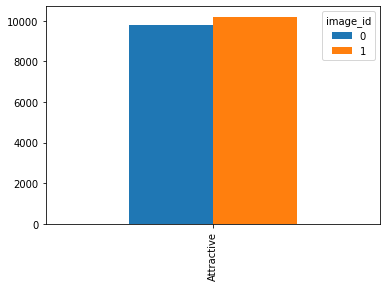

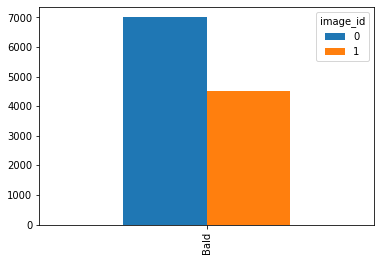

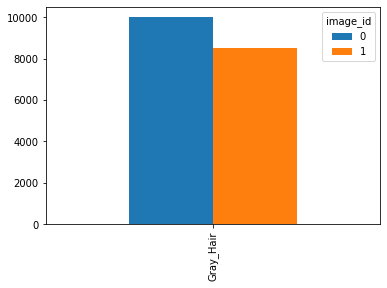

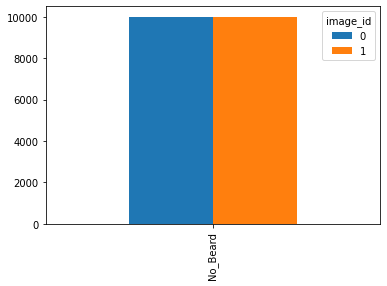

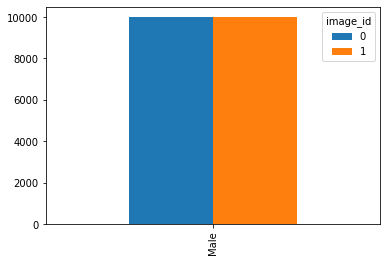

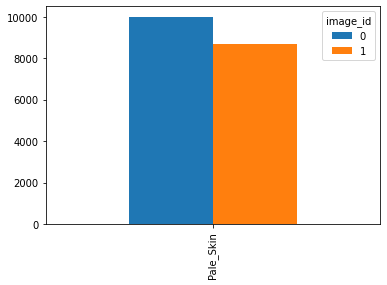

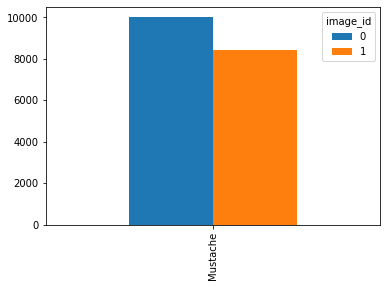

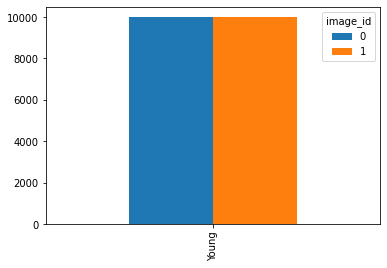

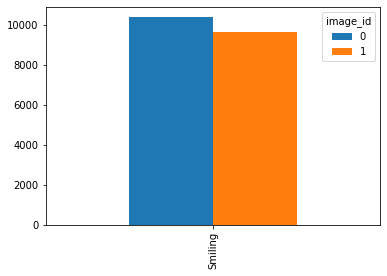

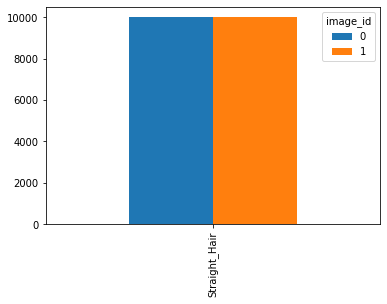

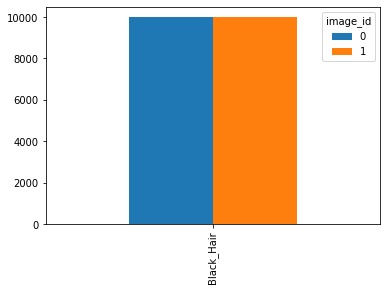

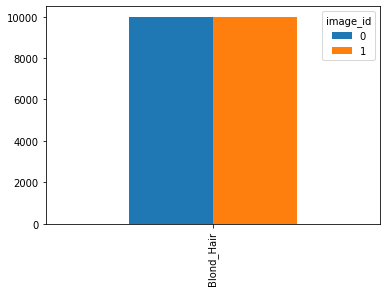

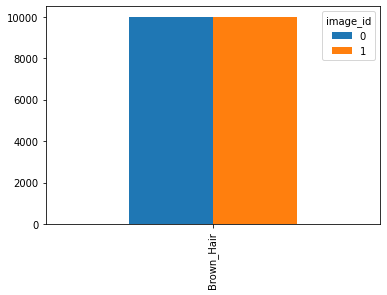

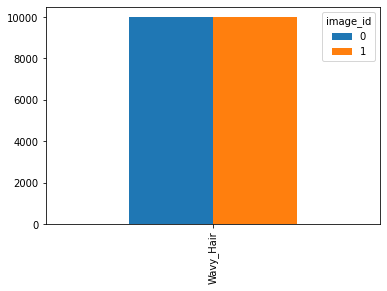

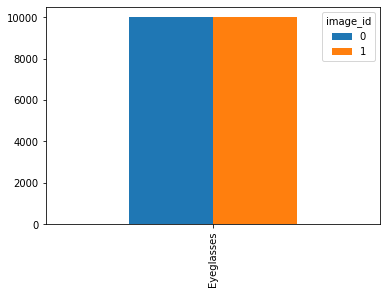

In [0]:
import os
import pickle
path = '/content/gdrive/My Drive/Big Data/Projet/Listes sample/'
for file in os.listdir(path) :
  if file[-4:] == '.pkl' :
    print(file)
    col = file[:-4]
    temp = pickle.load(open(path+file, "rb" ))
    df = desc.loc[desc[desc['image_id'].isin(temp) == True].index] 
    df = df.set_index('image_id') 
    df = df[[col]]
    df[col] = df[col].apply(lambda x : 0 if x == -1 else x)
    df2 = df.T
    df2['1'] = df2.sum(axis = 1)
    df2['0'] = df2['1'].apply(lambda x : len(df) - x)
    df2 = df2[['0', '1']]
    df2.plot(kind = 'bar')
  